# SETUP
---

## import packages

In [38]:
import pandas as pd
import numpy as np
import time

# file related packages
import glob
from fastparquet import ParquetFile

# model preparation
import umap
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# supervised learning algorithms
from sklearn.naive_bayes import MultinomialNB           # Multinomial Naive Bayes (Multi-class Classification)
from sklearn.neighbors import KNeighborsClassifier      # K Nearest Neighbor Classification
from sklearn.neighbors import KNeighborsRegressor      # K Nearest Neighbor Regression
from sklearn.ensemble import RandomForestClassifier     # Random Forest Classification
from sklearn.ensemble import RandomForestRegressor      # Random Forest Regression
from sklearn.ensemble import GradientBoostingClassifier # Gradient Boosting Classification
from sklearn.ensemble import GradientBoostingRegressor # Gradient Boosting Regression
from sklearn.svm import SVC                             # Support Vector Classification
from sklearn.svm import SVR                             # Support Vector Regression
from xgboost import XGBClassifier                       # Extreme Gradient Boosting Classification


# model evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

## set plot style

## define constants

In [39]:
VERBOSE = True
DEBUG = False

## load dataset

In [40]:
df = pd.read_csv('instacart_clustered.csv')
print(df.shape)
df.head()

(206059, 34)


,user_id,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,order_number,order_dow,order_hour,days_elapsed,reord1_log1p,num_items_log1p,order_number_log1p,days_elapsed_log1p,Cluster1,Cluster2
0,1,0,0,0,5,0,0,15,0,0,...,11,2.636364,10.090909,17.272727,1.729239,1.996554,2.484907,2.905410,3,0
1,2,17,0,2,36,0,3,9,0,0,...,14,2.142857,10.571429,14.142857,2.033772,2.703277,2.708050,2.717529,3,0
2,3,6,0,0,38,0,0,3,0,4,...,13,1.384615,16.307692,11.076923,1.654558,2.050171,2.639057,2.491296,3,0
3,4,3,0,2,2,2,0,3,0,0,...,6,4.500000,12.500000,14.166667,0.154151,1.386294,1.945910,2.719100,1,2
4,5,2,0,0,23,0,4,0,0,1,...,5,1.400000,15.000000,9.200000,1.526056,2.322388,1.791759,2.322388,3,0


In [41]:
df.groupby('Cluster1')[['num_items','reord1']].describe()

num_items                                                      \
             count       mean       std       min       25%        50%   
Cluster1                                                                 
0          35716.0  11.014228  4.017287  1.350000  7.967742  10.666667   
1          76370.0   4.971991  2.373768  0.000000  3.142857   4.750000   
2           9825.0  12.377363  3.442081  3.295775  9.782609  12.274194   
3          84148.0  11.256143  3.777817  2.957746  8.454545  10.727273   

                                 reord1                                \
                75%        max    count      mean       std       min   
Cluster1                                                                
0         13.777778  25.352941  35716.0  6.916183  3.067460  0.318182   
1          6.500000  26.000000  76370.0  1.434387  0.834122  0.000000   
2         14.875000  23.235294   9825.0  9.177804  3.053118  1.130000   
3         13.555556  26.000000  84148.0  4.870586  2.462285  0.000000   

                                                    
               25%       50%        75%        max  
Cluster1                                            
0         4.636364  6.407407   8.684211  23.411765  
1         0.800000  1.333333   2.000000   6.000000  
2         6.903846  8.909091  11.259259  21.261905  
3         3.181818  4.272727   6.000000  25.000000

In [42]:
df.groupby('Cluster1')[['num_items','reord1']].describe()

num_items                                                      \
             count       mean       std       min       25%        50%   
Cluster1                                                                 
0          35716.0  11.014228  4.017287  1.350000  7.967742  10.666667   
1          76370.0   4.971991  2.373768  0.000000  3.142857   4.750000   
2           9825.0  12.377363  3.442081  3.295775  9.782609  12.274194   
3          84148.0  11.256143  3.777817  2.957746  8.454545  10.727273   

                                 reord1                                \
                75%        max    count      mean       std       min   
Cluster1                                                                
0         13.777778  25.352941  35716.0  6.916183  3.067460  0.318182   
1          6.500000  26.000000  76370.0  1.434387  0.834122  0.000000   
2         14.875000  23.235294   9825.0  9.177804  3.053118  1.130000   
3         13.555556  26.000000  84148.0  4.870586  2.462285  0.000000   

                                                    
               25%       50%        75%        max  
Cluster1                                            
0         4.636364  6.407407   8.684211  23.411765  
1         0.800000  1.333333   2.000000   6.000000  
2         6.903846  8.909091  11.259259  21.261905  
3         3.181818  4.272727   6.000000  25.000000

In [43]:
df.groupby('Cluster1')[['order_number','days_elapsed']].describe()

order_number                                                       \
                count       mean        std   min   25%   50%   75%    max   
Cluster1                                                                     
0             35716.0  32.758540  15.235384   7.0  22.0  29.0  40.0  100.0   
1             76370.0   8.983266   7.279798   1.0   5.0   6.0  10.0  100.0   
2              9825.0  62.660254  20.737344  20.0  46.0  58.0  78.0  100.0   
3             84148.0  11.146040   6.447902   1.0   6.0  10.0  14.0   71.0   

         days_elapsed                                                       \
                count       mean       std       min        25%        50%   
Cluster1                                                                     
0             35716.0   9.494881  3.478435  0.292929   7.000000   9.166667   
1             76370.0  15.106545  5.475002  0.000000  11.111111  15.500000   
2              9825.0   5.865667  2.066956  0.230000   4.301370   5.763636   
3             84148.0  14.330525  5.189706  0.000000  10.500000  14.431677   

                                
                75%        max  
Cluster1                        
0         11.714286  26.222222  
1         19.375000  30.000000  
2          7.210526  16.666667  
3         18.111111  30.000000

In [44]:
df[['order_number','num_items','reord1','days_elapsed']].describe()

,order_number,num_items,reord1,days_elapsed
count,206059.000000,206059.000000,206059.000000,206059.000000
mean,16.546766,8.938627,4.156987,13.376369
std,16.655699,4.540255,3.207144,5.584912
min,1.000000,0.000000,0.000000,0.000000
25%,6.000000,5.500000,1.726136,8.897436
50%,10.000000,8.454545,3.357143,13.230769
75%,20.000000,11.928571,5.800000,17.625000
max,100.000000,26.000000,25.000000,30.000000


# FEATURE ENGINEERING
---

# HELPER FUNCTIONS
---

## feature importance

In [45]:
def get_feature_importance(rgr, X_, Y_,title='Feature Importance'):
    print('--- Feature Importance ---')
    
    # fit model
    rgr.fit(X_,Y_)

    try:
        # get feature importance
        fi = rgr.feature_importances_
    except:
        print('\t --- NOTE: Feature Importance Not Supported ---')
        return
    
    # Make importances relative to max importance.
    fi = 100.0 * (fi / fi.max())

    # get sort IDs to align with feature name
    sorted_idx = np.argsort(fi)
    
    # set figure size
    plt.rcParams['figure.figsize'] = (12,6)
    
    # plot bar plot
    sns.barplot(X_.columns[sorted_idx], fi[sorted_idx], palette='Set1_r')
    plt.ylabel('Relative Importance')
    plt.xlabel('Feature')

    plt.xticks(rotation=90)
    plt.title(title, fontsize=18)

    plt.tight_layout()
    plt.show()

## regression cross-validation

In [46]:
def run_regressor(X_, Y_, regressor='rfr',**kwargs):
    
    if VERBOSE:
        print(f'--- run_regresor(): kwargs = {kwargs} ---')

    # start time
    start_time = time.time()
    
    # set plot size
    plt.rcParams['figure.figsize'] = (8,4)

    # choose classifier
    if VERBOSE:
        print('\t--- Selecting Regressor ---')
    if regressor == 'ols':
        rgr = LinearRegression()
    elif regressor == 'lasso':
        rgr = LassoCV(alphas=kwargs['alphas'], cv=kwargs['cv'])
    elif regressor == 'ridge':
        rgr = RidgeCV(alphas=kwargs['alphas'], cv=kwargs['cv'])
    elif regressor == 'elastic':
        rgr = ElasticNetCV(alphas=kwargs['alphas'], cv=kwargs['cv'], l1_ratio=kwargs['l1_ratio'])
    elif regressor == 'rfr':
        rgr = RandomForestRegressor(
            n_estimators=kwargs['n_estimators'], 
            criterion=kwargs['criterion'], 
            max_depth=kwargs['max_depth'], 
            bootstrap=kwargs['bootstrap']
        )
    elif regressor == 'gbr':
        rgr = GradientBoostingRegressor(
            learning_rate=kwargs['learning_rate'], 
            n_estimators=kwargs['n_estimators'],
            subsample=kwargs['subsample'],
            loss=kwargs['loss']
        )
    elif regressor == 'knn':
        rgr = KNeighborsRegressor(
            n_neighbors=kwargs['n_neighbors'],
            weights=kwargs['weights'],
            algorithm=kwargs['algorithm']
        )
    elif regressor == 'svr':
        rgr = SVR(
            C=kwargs['C'],
            kernel=kwargs['kernel']
        )
    else:
        raise 'Unknown classifier'

    # use stratified k-fold
    skf = StratifiedKFold(shuffle=True, n_splits=10)
    skf.get_n_splits(X_, Y_)        

    # run cross validation
    if VERBOSE:
        print('\t--- Executing cross-validation ---')
    cv = cross_val_score(rgr, X_, Y_, cv=10, scoring='neg_mean_squared_error')
    cv = cv * -1

    # convert results to single row dataframe
    cv = pd.DataFrame(cv).T

    # add mean
    cv['mean'] = cv.mean(axis=1)
    cv['std'] = cv.drop(['mean'],axis=1).std(axis=1)
    if VERBOSE:
        print('\t---',cv[['mean','std']],'---')

    # show cross validation heatmap
    plt.subplot(2,1,1)
    sns.heatmap(cv.drop(['std'],axis=1), cmap='RdYlGn_r', square=True, linewidth=0.5, annot=True, cbar=False)
    plt.yticks([])
    plt.xlabel('folds')
    plt.ylabel('score')
    plt.title('10-fold Cross Validation', fontsize=16)
              
    # train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X_, Y_, test_size=0.1)

    # execute fit on train dataset
    rgr.fit(X_train,y_train)
       
    if regressor in ['ols','lasso','ridge','elastic']:
        if regressor == 'ols':
            # add constant
            X_train = sm_.add_constant(X_train)

            # run statsmodels OLS
            results = sm_.OLS(y_train, X_train).fit()

            # print summary
            print(results.summary())
        else:
            print('\n--- Model Evaluation ---')
            print('Train R^2: ',rgr.score(X_train,y_train))
            print('Test R^2: ',rgr.score(X_test,y_test))
            
            print('\n--- Model Coefficients ---')
            print(rgr.coef_)
        
            print('\n--- Model Intercept (Constant) ---')
            print(rgr.intercept_)
            
            print('\n--- Best Alphas ---')
            print(rgr.alpha_)
            
            if regressor == 'elastic':
                print('\n--- l1 ratio ---')
                print(rgr.l1_ratio_)

    # get predictions on test dataset
    y_pred = rgr.predict(X_test)
    
    plt.tight_layout()
    plt.show()
    print(f'--- Completed in {(time.time() - start_time):.4f} seconds\n')
    return y_test, y_pred

## error analysis

In [73]:
def regression_error_analysis(model, dfx_std, dfy_std, xscaler, yscaler, rgr, plot='residual'):
    print('--- Regression Error Analysis ---')
    t0 = time.time()
        
    # train test split 
    x_train = dfx_std.sample(frac=0.8, random_state=1220).values
    x_test = dfx_std.drop(dfx_std.sample(frac=0.8, random_state=1220).index).values
    y_train = dfy_std.sample(frac=0.8, random_state=1220).values.reshape(-1, 1)
    y_test = dfy_std.drop(dfy_std.sample(frac=0.8, random_state=1220).index). values.reshape(-1,1)
    
    if DEBUG:
        print(x_train.shape,x_test.shape)
        print(y_train.shape,y_test.shape)
    
    # fit model
    rgr.fit(x_train, y_train)
    
    # get predictions
    y_pred = rgr.predict(x_test)
    
    # inverse scaler transform
    targets = yscaler.inverse_transform(y_test)
    predictions = yscaler.inverse_transform(y_pred)

    # inverse log transform
    targets = np.expm1(targets)
    predictions = np.expm1(predictions)
    
    # add predictions and residuals to original dataframe
    test_df = model.drop(model.sample(frac=0.8, random_state=1220).index)
    test_df['predictions'] = predictions
    test_df['residuals'] = test_df.days_elapsed - test_df.predictions
    test_df.Cluster1 = test_df.Cluster1.astype(int)
    
    if DEBUG:
        print(test_df)
    
    if plot is 'regression':
        plt.rcParams['figure.figsize'] = (12,6)
        
        #sns.scatterplot(data=test_df, x='days_elapsed', y='predictions', hue='Cluster1', palette=['blue','orange','green','red'])
        sns.lmplot(data=test_df, x='days_elapsed', y='predictions', hue='Cluster1', palette=['blue','orange','green','red'], height=6, aspect=2)
        plt.xlabel('days_elapsed')
        plt.ylabel('Predicted')
        plt.xticks(np.arange(0,40,2))
        plt.yticks(np.arange(0,22,2))
        plt.title('Predicted vs. Actual (days_elapsed)',fontsize=20)
        plt.tight_layout()
        plt.show()

    if plot is 'residual':
        plt.rcParams['figure.figsize'] = (24,18)
        
        plt.subplot(3,3,1)
        sns.scatterplot(data=test_df, x='days_elapsed', y='predictions', hue='Cluster1', palette=['blue','orange','green','red'])
        #sns.lmplot(data=test_df, x='days_elapsed', y='predictions', hue='Cluster1', palette=['blue','orange','green','red'], height=6, aspect=2)
        plt.xlabel('days_elapsed')
        plt.ylabel('Residuals (Actual - Prediction)')
        plt.title('Residuals vs. Actual (days_elapsed)',fontsize=20)
        
        plt.subplot(3,3,2)
        sns.scatterplot(data=test_df, x='days_elapsed', y='residuals', hue='Cluster1', palette=['blue','orange','green','red'])
        #sns.lmplot(data=test_df, x='days_elapsed', y='residuals', hue='Cluster1', palette=['blue','orange','green','red'], height=6, aspect=2)
        plt.xlabel('days_elapsed')
        plt.ylabel('Residuals (Actual - Prediction)')
        plt.title('Residuals vs. Actual (days_elapsed)',fontsize=20)
        
        plt.subplot(3,3,3)
        sns.scatterplot(data=test_df, x='order_number', y='residuals', hue='Cluster1', palette=['blue','orange','green','red'])
        #sns.lmplot(data=test_df, x='order_number', y='residuals', hue='Cluster1', palette=['blue','orange','green','red'], height=6, aspect=2)
        plt.xlabel('order_number')
        plt.ylabel('Residuals (Actual - Prediction)')
        plt.title('Residuals vs. Number of Orders',fontsize=20)
        
        plt.subplot(3,3,4)
        sns.scatterplot(data=test_df, x='num_items', y='residuals', hue='Cluster1', palette=['blue','orange','green','red'])
        #sns.lmplot(data=test_df, x='num_items', y='residuals', hue='Cluster1', palette=['blue','orange','green','red'], height=6, aspect=2)
        plt.xlabel('num_items')
        plt.ylabel('Residuals (Actual - Prediction)')
        plt.title('Residuals vs. Mean Number of Items Ordered',fontsize=20)
        
        plt.subplot(3,3,5)
        sns.scatterplot(data=test_df, x='reord1', y='residuals', hue='Cluster1', palette=['blue','orange','green','red'])
        #sns.lmplot(data=test_df, x='num_items', y='residuals', hue='Cluster1', palette=['blue','orange','green','red'], height=6, aspect=2)
        plt.xlabel('reord1')
        plt.ylabel('Residuals (Actual - Prediction)')
        plt.title('Residuals vs. Mean Number of Items Re-Ordered',fontsize=20)
        
        plt.subplot(3,3,6)
        sns.scatterplot(data=test_df, x='d4', y='residuals', hue='Cluster1', palette=['blue','orange','green','red'])
        #sns.lmplot(data=test_df, x='num_items', y='residuals', hue='Cluster1', palette=['blue','orange','green','red'], height=6, aspect=2)
        plt.xlabel('d4')
        plt.ylabel('Residuals (Actual - Prediction)')
        plt.title('Residuals vs. Number of Produce Items Ordered',fontsize=20)
        
        plt.subplot(3,3,7)
        sns.scatterplot(data=test_df, x='d16', y='residuals', hue='Cluster1', palette=['blue','orange','green','red'])
        #sns.lmplot(data=test_df, x='num_items', y='residuals', hue='Cluster1', palette=['blue','orange','green','red'], height=6, aspect=2)
        plt.xlabel('d16')
        plt.ylabel('Residuals (Actual - Prediction)')
        plt.title('Residuals vs. Number of Dairy/Eggs Items Ordered',fontsize=20)
        
        plt.subplot(3,3,8)
        sns.scatterplot(data=test_df, x='d7', y='residuals', hue='Cluster1', palette=['blue','orange','green','red'])
        #sns.lmplot(data=test_df, x='num_items', y='residuals', hue='Cluster1', palette=['blue','orange','green','red'], height=6, aspect=2)
        plt.xlabel('d7')
        plt.ylabel('Residuals (Actual - Prediction)')
        plt.title('Residuals vs. Number of Beverage Items Ordered',fontsize=20)
        
        plt.subplot(3,3,9)
        sns.scatterplot(data=test_df, x='d19', y='residuals', hue='Cluster1', palette=['blue','orange','green','red'])
        #sns.lmplot(data=test_df, x='num_items', y='residuals', hue='Cluster1', palette=['blue','orange','green','red'], height=6, aspect=2)
        plt.xlabel('d19')
        plt.ylabel('Residuals (Actual - Prediction)')
        plt.title('Residuals vs. Number of Snack Items Ordered',fontsize=20)
        
        plt.tight_layout()
        plt.show()
    print(f'\t--- RMSE={np.sqrt(np.mean((predictions-targets)**2)):.2f} ---')
    print(f'--- Regression Error Analysis Completed in {time.time()-t0:.2f} seconds ---')

# SUPERVISED LEARNING
---

## define model

In [48]:
# save off department list for later use
dept_list = ['d1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'd10', 'd11',
             'd12', 'd13', 'd14', 'd15', 'd16', 'd17', 'd18', 'd19', 'd20', 'd21']

In [49]:
def define_model(df_model, dept_PCA=True):
    print('--- Defining Model ---')
    t0 = time.time()
    
    x_scaler = StandardScaler()
    
    # do pca on departments
    if dept_PCA:
        depts = x_scaler.fit_transform(df_model.loc[:, 'd1':'d21'])
        pca = PCA(n_components=5)
        pca_data = pca.fit_transform(depts)

        print('\t--- PCA Results ---')
        print('\t--- % Variance explained by each component',pca.explained_variance_ratio_)
        print('\t--- % Varaince explained by all components:',f'{sum(pca.explained_variance_ratio_)*100:.2f}%')
    
    
    # select features
    if dept_PCA:
        df_model = df_model[['reord1','reord1_log1p','num_items','num_items_log1p','order_number','order_number_log1p','Cluster1','days_elapsed','days_elapsed_log1p']].copy()
    else:
        df_model = df_model[['reord1','reord1_log1p','num_items','num_items_log1p','order_number','order_number_log1p','Cluster1','days_elapsed','days_elapsed_log1p'] + dept_list].copy()
    df_model.Cluster1 = df_model.Cluster1.astype(str)
    print('\t--- Initial Features Selected ---')
    if DEBUG:
        print('\t---',df_model.columns.to_list())
    
    # one-hot encoding
    X = pd.get_dummies(df_model.drop(['reord1','num_items','order_number','order_number_log1p','days_elapsed','days_elapsed_log1p',], axis=1), drop_first=True)
    print('\t--- One-Hot Encoding Completed ---')
    if DEBUG:
        print('\t---',X.columns.to_list())
    
    # standardize input variables
    X_std = x_scaler.fit_transform(X)
    print('\t--- Input Variable Standardization Completed ---')
    if DEBUG:
        print('\t---',X_std.shape)
    
    # add pca components
    if dept_PCA:
        X_std_orig = X_std
        X_std = np.concatenate((X_std_orig,pca_data),axis=1)
        df_X_std = pd.DataFrame(X_std)
        df_X_std.columns = X.columns.to_list() + ['pca1','pca2','pca3','pca4','pca5']
        print('\t--- PCA Components Added to Model ---')
    else:
        df_X_std = pd.DataFrame(X_std)
        df_X_std.columns = X.columns.to_list()
    if DEBUG:
            print('\t---',df_X_std.columns.to_list())
    
    # select output variable
    Y = df_model.days_elapsed_log1p

    # standardize output variables
    y_scaler = StandardScaler()
    Y_std = y_scaler.fit_transform(Y.values.reshape(-1,1))
    df_Y_std = pd.DataFrame(Y_std)
    print('\t--- Target Variable Defined and Standardized ---')
    if DEBUG:
        print('\t---',df_Y_std.columns.to_list())
    
    return df_model, df_X_std, df_Y_std, x_scaler, y_scaler, X_std, Y_std, X, Y

In [50]:
# copy original dataframe
df_model = df.copy().sample(frac=0.1, random_state=1220)

df_model, df_X_std, df_Y_std, x_scaler, y_scaler, X_std, Y_std, X, Y = define_model(df_model, False)

--- Defining Model ---
	--- Initial Features Selected ---
	--- One-Hot Encoding Completed ---
	--- Input Variable Standardization Completed ---
	--- Target Variable Defined and Standardized ---


In [51]:
df_model

,reord1,reord1_log1p,num_items,num_items_log1p,order_number,order_number_log1p,Cluster1,days_elapsed,days_elapsed_log1p,d1,...,d12,d13,d14,d15,d16,d17,d18,d19,d20,d21
64835,1.500000,0.916291,8.625000,2.264364,8,2.197225,1,15.625000,2.810908,5,...,3,0,3,1,7,1,0,1,5,0
96144,11.076923,2.491296,16.076923,2.837728,13,2.639057,3,16.692308,2.873130,30,...,0,5,0,2,34,3,14,8,6,0
56177,0.875000,0.628609,1.625000,0.965081,8,2.197225,1,23.125000,3.183249,0,...,0,0,0,0,0,3,0,0,0,0
81610,4.720930,1.744131,7.883721,2.184220,86,4.465908,2,4.244186,1.657120,28,...,11,49,60,25,127,5,71,57,5,2
46519,3.000000,1.386294,13.000000,2.639057,4,1.609438,3,11.250000,2.505526,17,...,0,5,2,0,4,1,0,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68471,5.528302,1.876147,7.471698,2.136731,53,3.988984,0,6.830189,2.057987,7,...,8,25,0,1,44,4,0,3,24,0
67959,6.157895,1.968216,11.052632,2.489283,19,2.995732,3,15.736842,2.817612,27,...,0,11,1,2,66,0,15,6,11,0
178352,1.384615,0.869038,2.307692,1.196251,13,2.639057,1,14.076923,2.713165,0,...,0,0,0,0,5,0,0,15,0,0
38790,2.916667,1.365241,5.916667,1.933934,12,2.564949,3,15.750000,2.818398,7,...,3,4,0,2,19,3,0,0,1,0


In [52]:
df_X_std

,reord1_log1p,num_items_log1p,d1,d2,d3,d4,d5,d6,d7,d8,...,d15,d16,d17,d18,d19,d20,d21,Cluster1_1,Cluster1_2,Cluster1_3
0,-0.871585,0.167694,-0.306519,-0.183798,-0.340936,-0.134167,-0.136522,-0.053114,-0.422495,-0.135776,...,-0.446298,-0.462089,-0.300956,-0.194215,-0.542452,0.059782,-0.233816,1.304363,-0.220933,-0.828903
1,1.678738,1.297269,1.301277,-0.183798,-0.028162,0.471135,-0.136522,-0.422868,-0.376275,-0.135776,...,-0.322011,0.265182,-0.052658,1.427570,-0.208307,0.181942,-0.233816,-0.766658,-0.220933,1.206414
2,-1.337413,-2.392000,-0.628078,-0.183798,-0.549452,-0.690390,-0.136522,-0.422868,-0.098954,-0.135776,...,-0.570586,-0.650641,-0.052658,-0.194215,-0.590187,-0.551020,-0.233816,1.304363,-0.220933,-0.828903
3,0.468893,0.009805,1.172654,0.924258,2.369773,1.779894,-0.136522,-0.053114,0.501908,-0.135776,...,2.536608,2.770228,0.195641,8.030553,2.130709,0.059782,1.149080,-0.766658,4.526253,-0.828903
4,-0.110533,0.905871,0.465223,-0.183798,-0.549452,-0.543154,-0.136522,-0.422868,-0.422495,-0.135776,...,-0.570586,-0.542897,-0.300956,-0.194215,-0.446982,-0.062378,-0.233816,-0.766658,-0.220933,1.206414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20601,0.682659,-0.083753,-0.177895,3.140369,-0.236678,2.548790,-0.136522,2.165411,2.396933,-0.135776,...,-0.446298,0.534542,0.071492,-0.194215,-0.446982,2.380827,-0.233816,-0.766658,-0.220933,-0.828903
20602,0.831741,0.610803,1.108342,-0.183798,0.910160,0.094866,-0.136522,-0.422868,-0.330055,-0.135776,...,-0.322011,1.127133,-0.425105,1.543412,-0.303777,0.792743,-0.233816,-0.766658,-0.220933,1.206414
20603,-0.948099,-1.936576,-0.628078,-0.183798,-0.549452,-0.559514,-0.136522,-0.422868,-0.468715,-0.135776,...,-0.570586,-0.515961,-0.425105,-0.194215,0.125838,-0.551020,-0.233816,1.304363,-0.220933,-0.828903
20604,-0.144624,-0.483280,-0.177895,-0.183798,-0.028162,-0.428638,-0.136522,0.316640,-0.237614,-0.135776,...,-0.322011,-0.138858,-0.052658,-0.194215,-0.590187,-0.428859,-0.233816,-0.766658,-0.220933,1.206414


In [53]:
df_Y_std

,0
0,0.525143
1,0.663694
2,1.354242
3,-2.044020
4,-0.154857
...,...
20601,-1.151402
20602,0.540072
20603,0.307498
20604,0.541822


## random forest regression

### default tuning

In [ ]:
print('--- Random Forest Regression: Default Parameters ---')

actual, predicted = run_regressor(X_std, Y_std, 'rfr', num_trees=100, criterion='mse', depth=None, bootstrap=True)

In [ ]:
rgr = RandomForestRegressor()

In [ ]:
regression_error_analysis(df_tmp, rgr, 'residual')

In [ ]:
regression_error_analysis(df_tmp, rgr, 'regression')

### grid search

In [ ]:
print('--- Random Forest Classification: Grid Search ---')
# define classifier

# define parameters

# run grid search

# fit grid results

print('\t --- Best Parameters ---')

print('\t --- Best Estimator ---')

In [ ]:
print('--- Random Forest Classification: Tuned Parameters ---')

## gradient boosting regression

### default tuning

In [ ]:
print('--- Gradient Boosting Regression: Default Parameters ---')
actual, predicted = run_regressor(X_std, Y_std, 'gbr',learning_rate=0.1, n_estimators=100, subsample=1.0)

### grid search

In [ ]:
print('--- Gradient Boosting Regression: Grid Search ---')

# start timer
t0 = time.time()

# define regressor
rgr = GradientBoostingRegressor()

# define parameters
param_grid = {
    'loss':['ls','lad','quantile'],
    'learning_rate':[0.1,0.9],
    'n_estimators':[100,300,500],
    'subsample':[0.1,1.0]
}

# run grid search
grid = GridSearchCV(rgr, param_grid, refit=True)

# fit to model
grid.fit(X_std,Y_std)

print('\t --- Best Parameters ---')
print('\t',grid.best_params_)

print(f'\t--- Gradient Boosting Regression grid search completed in {time.time()-t0:.2f} seconds')

### post-tuning

In [ ]:
print('--- Gradient Boosting Regression: Tuned Parameters ---')
actual, predicted = run_regressor(X_std, Y_std, 'gbr',learning_rate=0.1, n_estimators=100, subsample=1.0, loss='ls')

In [ ]:
rgr = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, subsample=1.0, loss='ls')

In [ ]:
# feature importance
rgr.fit(X_std,Y_std)
get_feature_importance(rgr, df_X_std, df_Y_std, 'Feature Importance: Gradient Boosting')

In [ ]:
# error analysis: residuals
regression_error_analysis(df_model, df_X_std, df_Y_std, x_scaler, y_scaler, rgr, 'residual')

In [ ]:
regression_error_analysis(df_model, df_X_std, df_Y_std, x_scaler, y_scaler, rgr, 'regression')

## support vector regression

### default tuning

In [ ]:
print('--- Support Vector Classification: Default Parameters ---')
actual, predicted = run_regressor(X_std,Y_std,'svr',C=1.0,kernel='rbf',gamma='scale')

In [ ]:
df_tmp = df_model.copy()
rgr = SVR()
regression_error_analysis(df_tmp, rgr, 'residual')

In [ ]:
regression_error_analysis(df_tmp, rgr, 'regression')

### grid search

In [ ]:
print('--- Support Vector Classification: Grid Search')
# define classifier

# define parameters

# run grid search

# fit grid results

print('\t --- Best Parameters ---')

print('\t --- Best Estimator ---')

In [ ]:
print('--- Support Vector Classification: Tuned Parameters ---')

## knn regression

### default tuning

--- KNN Regression: Default Parameters ---
--- run_regresor(): kwargs = {'n_neighbors': 5, 'weights': 'uniform', 'algorithm': 'auto'} ---
	--- Selecting Regressor ---
	--- Executing cross-validation ---
	---        mean       std
0  0.802414  0.031193 ---


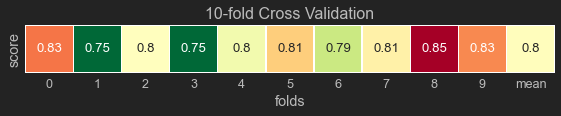

--- Completed in 24.2587 seconds



In [25]:
print('--- KNN Regression: Default Parameters ---')
actual, predicted = run_regressor(X_std, Y_std, 'knn',n_neighbors=5,weights='uniform', algorithm='auto')

### grid search

In [ ]:
print('--- KNN Regression: Grid Search ---')

# start timer
t0 = time.time()

# define regressor
rgr=KNeighborsRegressor()

# define parameters
param_grid = {
    'n_neighbors':[5,10,20,50,100],
    'weights':['uniform','distance'],
    'algorithm':['auto','ball_tree','kd_tree','brute']
}

# run grid search
grid = GridSearchCV(rgr, param_grid, refit=True)

# fit to model
grid.fit(X_std,Y_std)

print('\t --- Best Parameters ---')
print('\t',grid.best_params_)

print(f'\t--- KNN Regression grid search completed in {time.time()-t0:.2f} seconds')

### post-tuning

In [87]:
# copy original dataframe
df_model = df.copy().sample(frac=1.0, random_state=1220)

df_model, df_X_std, df_Y_std, x_scaler, y_scaler, X_std, Y_std, X, Y = define_model(df_model, False)

--- Defining Model ---
	--- Initial Features Selected ---
	--- One-Hot Encoding Completed ---
	--- Input Variable Standardization Completed ---
	--- Target Variable Defined and Standardized ---


In [ ]:
print('--- KNN Regression: Tuned Parameters ---')
actual, predicted = run_regressor(X_std, Y_std, 'knn',n_neighbors=50,weights='distance',algorithm='ball_tree')

--- KNN Regression: Tuned Parameters ---
--- run_regresor(): kwargs = {'n_neighbors': 50, 'weights': 'distance', 'algorithm': 'ball_tree'} ---
	--- Selecting Regressor ---
	--- Executing cross-validation ---


In [ ]:
rgr = KNeighborsRegressor(n_neighbors=50, weights='distance',algorithm='ball_tree')

In [ ]:
regression_error_analysis(df_model, df_X_std, df_Y_std, x_scaler, y_scaler, rgr, 'residual')

### knn on population

In [ ]:
# copy original dataframe
df_model = df.copy()
#df_cl0 = df_model[df_model.Cluster1==0]
#df_cl1 = df_model[df_model.Cluster1==1]
#df_cl2 = df_model[df_model.Cluster1==2]
#df_cl3 = df_model[df_model.Cluster1==3]

df_model, df_X_std, df_Y_std, x_scaler, y_scaler, X_std, Y_std, X, Y = define_model(df_model, False)

In [ ]:
rgr = KNeighborsRegressor(n_neighbors=50, weights='distance',algorithm='ball_tree')

In [ ]:
regression_error_analysis(df_model, df_X_std, df_Y_std, x_scaler, y_scaler, rgr, 'residual')